In [1]:
#import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing GBM-TP dataset
df= pd.read_csv("GBM features.csv")# header=None, skiprows=1)
#df = df.rename(columns=df.iloc[0]).drop(df.index[0])

df

,tcga_participant_barcode,CLI_years_to_birth,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_tumor_tissue_site,CLI_gender,CLI_date_of_initial_pathologic_diagnosis,CLI_radiation_therapy,CLI_karnofsky_performance_score,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
0,TCGA-02-0001,44.0,1.0,358.0,NaN,brain,female,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0003,50.0,1.0,144.0,NaN,brain,male,2003.0,yes,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-02-0004,59.0,1.0,345.0,NaN,brain,male,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0006,56.0,1.0,558.0,NaN,brain,female,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0007,40.0,1.0,705.0,NaN,brain,female,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,TCGA-28-2501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,TCGA-28-2510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.154687,NaN,2.033891e-01,11.593034,8.549916,9.172069e+00,8.119281e+00,2.662844e+00,9.587107,9.102759
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,all_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#dropping last 7 rows
df = df[:-7]
df.describe()

,CLI_years_to_birth,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLUS_mRNA_cNMF,CLUS_mRNA_cHierarchical,CLUS_miR_cNMF,CLUS_miR_cHierarchical,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
count,595.000000,595.000000,490.000000,102.000000,595.000000,442.000000,525.000000,525.000000,563.000000,563.000000,...,152.000000,79.000000,85.000000,152.000000,152.000000,152.000000,152.000000,148.000000,132.000000,152.000000
mean,57.816807,0.825210,504.500000,479.392157,2004.815126,77.036199,2.411429,2.521905,2.358792,1.694494,...,8.391366,0.006872,0.819793,11.378832,8.531753,10.663180,8.207051,3.795454,2.970595,8.463340
std,14.416311,0.380107,538.727567,540.490283,5.042524,15.621473,1.160030,1.205108,1.109265,0.823858,...,0.646618,1.145642,1.625535,0.707082,0.949599,0.677703,0.610553,2.616939,2.933303,0.557311
min,10.000000,0.000000,3.000000,0.000000,1989.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.145604,-1.442614,-2.324094,9.509399,6.576217,7.945228,6.244802,-0.728335,-1.264651,6.769460
25%,50.000000,1.000000,170.500000,156.250000,2002.000000,70.000000,1.000000,1.000000,1.000000,1.000000,...,8.081150,-1.003053,-0.379320,10.892015,7.847445,10.315993,7.885770,1.837445,0.605386,8.073609
50%,59.000000,1.000000,382.000000,261.000000,2006.000000,80.000000,2.000000,3.000000,2.000000,1.000000,...,8.424897,-0.264478,0.732313,11.384922,8.425896,10.723506,8.298700,3.352512,2.395577,8.490003
75%,68.000000,1.000000,609.250000,628.000000,2009.000000,80.000000,3.000000,4.000000,3.000000,2.000000,...,8.735703,0.759610,1.766129,11.831858,9.189655,11.015581,8.616618,5.412086,5.050278,8.838695
max,89.000000,1.000000,3881.000000,2818.000000,2013.000000,100.000000,4.000000,4.000000,4.000000,3.000000,...,10.410538,3.100052,5.983931,13.677023,12.420853,12.380909,9.994246,10.709237,10.045556,9.837085


In [3]:
df

,tcga_participant_barcode,CLI_years_to_birth,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_tumor_tissue_site,CLI_gender,CLI_date_of_initial_pathologic_diagnosis,CLI_radiation_therapy,CLI_karnofsky_performance_score,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
0,TCGA-02-0001,44.0,1.0,358.0,NaN,brain,female,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0003,50.0,1.0,144.0,NaN,brain,male,2003.0,yes,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-02-0004,59.0,1.0,345.0,NaN,brain,male,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0006,56.0,1.0,558.0,NaN,brain,female,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0007,40.0,1.0,705.0,NaN,brain,female,2002.0,yes,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,TCGA-87-5896,50.0,0.0,NaN,800.0,brain,female,2010.0,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,TCGA-OX-A56R,68.0,1.0,180.0,NaN,brain,male,2012.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,TCGA-RR-A6KA,72.0,1.0,191.0,NaN,brain,female,2012.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,TCGA-RR-A6KB,51.0,0.0,NaN,0.0,brain,male,2007.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#lets see what features we get
col_list = list()
for col in df.columns:
    col_list.append(col)

In [5]:
#col_list

### we can see that the first 13 features are clinical features(CLIs), including: 

In [6]:
CLIs_col_list = col_list[0:13]
CLIs_col_list

['tcga_participant_barcode',
 'CLI_years_to_birth',
 'CLI_vital_status',
 'CLI_days_to_death',
 'CLI_days_to_last_followup',
 'CLI_tumor_tissue_site',
 'CLI_gender',
 'CLI_date_of_initial_pathologic_diagnosis',
 'CLI_radiation_therapy',
 'CLI_karnofsky_performance_score',
 'CLI_histological_type',
 'CLI_race',
 'CLI_ethnicity']

### while the rest are genomic features.
### As a preliminary lookup, lets take a look at the CLIs first

In [7]:
CLIs_df = df.filter(CLIs_col_list, axis=1)

In [8]:
CLIs_df

,tcga_participant_barcode,CLI_years_to_birth,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_tumor_tissue_site,CLI_gender,CLI_date_of_initial_pathologic_diagnosis,CLI_radiation_therapy,CLI_karnofsky_performance_score,CLI_histological_type,CLI_race,CLI_ethnicity
0,TCGA-02-0001,44.0,1.0,358.0,NaN,brain,female,2002.0,yes,80.0,untreated primary (de novo) gbm,white,not hispanic or latino
1,TCGA-02-0003,50.0,1.0,144.0,NaN,brain,male,2003.0,yes,100.0,untreated primary (de novo) gbm,white,not hispanic or latino
2,TCGA-02-0004,59.0,1.0,345.0,NaN,brain,male,2002.0,yes,80.0,untreated primary (de novo) gbm,white,not hispanic or latino
3,TCGA-02-0006,56.0,1.0,558.0,NaN,brain,female,2002.0,yes,80.0,untreated primary (de novo) gbm,white,not hispanic or latino
4,TCGA-02-0007,40.0,1.0,705.0,NaN,brain,female,2002.0,yes,80.0,treated primary gbm,white,not hispanic or latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,TCGA-87-5896,50.0,0.0,NaN,800.0,brain,female,2010.0,yes,NaN,untreated primary (de novo) gbm,white,not hispanic or latino
591,TCGA-OX-A56R,68.0,1.0,180.0,NaN,brain,male,2012.0,NaN,NaN,glioblastoma multiforme (gbm),black or african american,not hispanic or latino
592,TCGA-RR-A6KA,72.0,1.0,191.0,NaN,brain,female,2012.0,no,NaN,glioblastoma multiforme (gbm),black or african american,not hispanic or latino
593,TCGA-RR-A6KB,51.0,0.0,NaN,0.0,brain,male,2007.0,NaN,NaN,glioblastoma multiforme (gbm),black or african american,not hispanic or latino


In [9]:
CLIs_df.describe()

,CLI_years_to_birth,CLI_vital_status,CLI_days_to_death,CLI_days_to_last_followup,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score
count,595.000000,595.000000,490.000000,102.000000,595.000000,442.000000
mean,57.816807,0.825210,504.500000,479.392157,2004.815126,77.036199
std,14.416311,0.380107,538.727567,540.490283,5.042524,15.621473
min,10.000000,0.000000,3.000000,0.000000,1989.000000,0.000000
25%,50.000000,1.000000,170.500000,156.250000,2002.000000,70.000000
50%,59.000000,1.000000,382.000000,261.000000,2006.000000,80.000000
75%,68.000000,1.000000,609.250000,628.000000,2009.000000,80.000000
max,89.000000,1.000000,3881.000000,2818.000000,2013.000000,100.000000


In [10]:
uniqueSite = CLIs_df['CLI_tumor_tissue_site'].unique()
print('Number of unique values in column "CLI_tumor_tissue_site" including NaN')
print(uniqueSite)

Number of unique values in column "CLI_tumor_tissue_site" including NaN
['brain']


### As brain is the only tumour site, it can be neglected.

In [11]:
uniqueGender = CLIs_df['CLI_gender'].unique()
print('Number of unique values in column "CLI_gender" including NaN')
print(uniqueGender)

Number of unique values in column "CLI_gender" including NaN
['female' 'male']


In [12]:
uniqueRadiation = CLIs_df['CLI_radiation_therapy'].unique()
print('Number of unique values in column "CLI_radiation_therapy" including NaN')
print(uniqueRadiation)

Number of unique values in column "CLI_radiation_therapy" including NaN
['yes' nan 'no']


In [13]:
#what foes histological type means?
uniqueHistology = CLIs_df['CLI_histological_type'].unique()
print('Number of unique values in column "CLI_histological_type" including NaN')
print(uniqueHistology)

Number of unique values in column "CLI_histological_type" including NaN
['untreated primary (de novo) gbm' 'treated primary gbm'
 'glioblastoma multiforme (gbm)']


In [14]:
uniqueRace = CLIs_df['CLI_race'].unique()
print('Number of unique values in column "CLI_race" including NaN')
print(uniqueRace)

Number of unique values in column "CLI_race" including NaN
['white' 'black or african american' nan 'asian']


In [15]:
uniqueEthnicity = CLIs_df['CLI_ethnicity'].unique()
print('Number of unique values in column "CLI_ethnicity" including NaN')
print(uniqueEthnicity)

Number of unique values in column "CLI_ethnicity" including NaN
['not hispanic or latino' 'hispanic or latino' nan]


### Quick summary in CLIs:

In [16]:
"""
#Preliminary features:

numerical_CLIs_list = [
    'CLI_years_to_birth', #age
    'CLI_days_to_death',  
    'CLI_days_to_last_followup', #has value only if not yet dead <-> NaN means dead, thus stop counting
    'CLI_date_of_initial_pathologic_diagnosis', #seemes useless, unless we want to generalise that "technological advancement prolongs life"?
    'CLI_karnofsky_performance_score' #range from 0 to 100. A higher score means the patient is better able to carry out daily activities.
]

categorical_CLIs_list = [
    'CLI_vital_status',     # 1 = dead
    'CLI_tumor_tissue_site',    #all are brain-->can drop
    'CLI_gender',
    'CLI_radiation_therapy',    #better convert yes/no to 0/1
    'CLI_histological_type',    #3 forms, ['untreated primary (de novo) gbm' 'treated primary gbm', 'glioblastoma multiforme (gbm)']
    'CLI_race',             #3 forms, ['white' 'black or african american' nan 'asian']. 
    'CLI_ethnicity'         #2 forms, [nan 'hispanic or latino' 'not hispanic or latino']. Can convert to binary???check if also true for other cancers
"""

'\n#Preliminary features:\n\nnumerical_CLIs_list = [\n    \'CLI_years_to_birth\', #age\n    \'CLI_days_to_death\',  \n    \'CLI_days_to_last_followup\', #has value only if not yet dead <-> NaN means dead, thus stop counting\n    \'CLI_date_of_initial_pathologic_diagnosis\', #seemes useless, unless we want to generalise that "technological advancement prolongs life"?\n    \'CLI_karnofsky_performance_score\' #range from 0 to 100. A higher score means the patient is better able to carry out daily activities.\n]\n\ncategorical_CLIs_list = [\n    \'CLI_vital_status\',     # 1 = dead\n    \'CLI_tumor_tissue_site\',    #all are brain-->can drop\n    \'CLI_gender\',\n    \'CLI_radiation_therapy\',    #better convert yes/no to 0/1\n    \'CLI_histological_type\',    #3 forms, [\'untreated primary (de novo) gbm\' \'treated primary gbm\', \'glioblastoma multiforme (gbm)\']\n    \'CLI_race\',             #3 forms, [\'white\' \'black or african american\' nan \'asian\']. \n    \'CLI_ethnicity\'     

## Data processong:
### 1. Drop the rows with CLI_days_to_death = NaN
### 2. Drop the column CLI_days_to_last_followup
### 3. Drop the column CLI_tumor_tissue_site, as all sites are "brain" for GBM
### 4. Rename the column CLI_days_to_death to Overall_Survival
### 5. Drop the column CLI_vital_status as the remaining entries are all dead(status=1)

### Intuition: Only deceased entries can be used for training, as the task is to predict the overall survival days of patients. The surviving ones never "fully experienced" their survival at the time point of sampling and there is no way to tell how long their survival would remains, thus is an underestimation of overall survival.

### Note: The original plan was to take the SUM of CLI_days_to_death and CLI_days_to_last_followup as Overall_Survival. However, this would be an underestimation for living patients(see Intuition). Thus only deseased patients are considered and Overall_Survival will be CLI_days_to_death automatically(as all surviving patients have NaN in CLI_days_to_death).

### 6. One-hot encoding categorical features
### 7. Replace NaN in CLI_karnofsky_performance_score by the median score(=80)

In [17]:
#Processed features:
key = ['tcga_participant_barcode']

numerical_CLIs_list = [
    'CLI_years_to_birth', #age
    'CLI_days_to_death',  #changed to Overall_Survival
    'CLI_date_of_initial_pathologic_diagnosis', #seemes useless, unless we want to generalise that "technological advancement prolongs life"?
    'CLI_karnofsky_performance_score' #range from 0 to 100. A higher score means the patient is better able to carry out daily activities.
]

categorical_CLIs_list = [
    'CLI_gender',
    'CLI_radiation_therapy',    #better convert yes/no to 0/1
    'CLI_histological_type',    #3 forms, ['untreated primary (de novo) gbm' 'treated primary gbm', 'glioblastoma multiforme (gbm)']
    'CLI_race',             #4 forms, ['white' 'black or african american' nan 'asian']. 
    'CLI_ethnicity'         #3 forms, [nan 'hispanic or latino' 'not hispanic or latino'].
]

In [18]:
#Modify df according to processed features:
processed_CLIs_df = CLIs_df.filter(key + numerical_CLIs_list + categorical_CLIs_list, axis=1)
processed_CLIs_df = processed_CLIs_df[processed_CLIs_df['CLI_days_to_death'].notnull()]
processed_CLIs_df.rename(columns={'CLI_days_to_death': 'Overall_Survival'}, inplace=True)
processed_CLIs_df

,tcga_participant_barcode,CLI_years_to_birth,Overall_Survival,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLI_gender,CLI_radiation_therapy,CLI_histological_type,CLI_race,CLI_ethnicity
0,TCGA-02-0001,44.0,358.0,2002.0,80.0,female,yes,untreated primary (de novo) gbm,white,not hispanic or latino
1,TCGA-02-0003,50.0,144.0,2003.0,100.0,male,yes,untreated primary (de novo) gbm,white,not hispanic or latino
2,TCGA-02-0004,59.0,345.0,2002.0,80.0,male,yes,untreated primary (de novo) gbm,white,not hispanic or latino
3,TCGA-02-0006,56.0,558.0,2002.0,80.0,female,yes,untreated primary (de novo) gbm,white,not hispanic or latino
4,TCGA-02-0007,40.0,705.0,2002.0,80.0,female,yes,treated primary gbm,white,not hispanic or latino
...,...,...,...,...,...,...,...,...,...,...
586,TCGA-76-6663,44.0,567.0,2011.0,80.0,female,yes,untreated primary (de novo) gbm,white,NaN
588,TCGA-81-5910,64.0,49.0,2009.0,40.0,male,no,untreated primary (de novo) gbm,white,NaN
591,TCGA-OX-A56R,68.0,180.0,2012.0,NaN,male,NaN,glioblastoma multiforme (gbm),black or african american,not hispanic or latino
592,TCGA-RR-A6KA,72.0,191.0,2012.0,NaN,female,no,glioblastoma multiforme (gbm),black or african american,not hispanic or latino


In [19]:
#one-hot encoding
#for columns which null values exist(all columns except gender), drop_first=false since the categories are not collectively exhausive
# -->0 in all categories implies NaN

genderDummy = pd.get_dummies(processed_CLIs_df['CLI_gender'],drop_first=True,prefix='CLI_gender')
radiationDummy = pd.get_dummies(processed_CLIs_df['CLI_radiation_therapy'],drop_first=False,prefix='CLI_radiation_therapy')
histologicalDummy = pd.get_dummies(processed_CLIs_df['CLI_histological_type'],drop_first=False,prefix='CLI_histological_type')
raceDummy = pd.get_dummies(processed_CLIs_df['CLI_race'],drop_first=False,prefix='CLI_race')
ethnicityDummy = pd.get_dummies(processed_CLIs_df['CLI_ethnicity'],drop_first=False,prefix='CLI_ethnicity')

processed_CLIs_df = processed_CLIs_df.drop(columns=['CLI_gender','CLI_radiation_therapy','CLI_histological_type','CLI_race','CLI_ethnicity'])
processed_CLIs_df = pd.concat([processed_CLIs_df,genderDummy,radiationDummy,histologicalDummy,raceDummy,ethnicityDummy],axis=1,sort=True)


In [20]:
processed_CLIs_df

,tcga_participant_barcode,CLI_years_to_birth,Overall_Survival,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLI_gender_male,CLI_radiation_therapy_no,CLI_radiation_therapy_yes,CLI_histological_type_glioblastoma multiforme (gbm),CLI_histological_type_treated primary gbm,CLI_histological_type_untreated primary (de novo) gbm,CLI_race_asian,CLI_race_black or african american,CLI_race_white,CLI_ethnicity_hispanic or latino,CLI_ethnicity_not hispanic or latino
0,TCGA-02-0001,44.0,358.0,2002.0,80.0,0,0,1,0,0,1,0,0,1,0,1
1,TCGA-02-0003,50.0,144.0,2003.0,100.0,1,0,1,0,0,1,0,0,1,0,1
2,TCGA-02-0004,59.0,345.0,2002.0,80.0,1,0,1,0,0,1,0,0,1,0,1
3,TCGA-02-0006,56.0,558.0,2002.0,80.0,0,0,1,0,0,1,0,0,1,0,1
4,TCGA-02-0007,40.0,705.0,2002.0,80.0,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,TCGA-76-6663,44.0,567.0,2011.0,80.0,0,0,1,0,0,1,0,0,1,0,0
588,TCGA-81-5910,64.0,49.0,2009.0,40.0,1,1,0,0,0,1,0,0,1,0,0
591,TCGA-OX-A56R,68.0,180.0,2012.0,NaN,1,0,0,1,0,0,0,1,0,0,1
592,TCGA-RR-A6KA,72.0,191.0,2012.0,NaN,0,1,0,1,0,0,0,1,0,0,1


In [21]:
#replace NaN by median CLI_karnofsky_performance_score(80)
processed_CLIs_df['CLI_karnofsky_performance_score'].median()

80.0

In [22]:
#replace NaN by median CLI_karnofsky_performance_score(80)
processed_CLIs_df['CLI_karnofsky_performance_score'].fillna(processed_CLIs_df['CLI_karnofsky_performance_score'].median(), inplace=True)
processed_CLIs_df

,tcga_participant_barcode,CLI_years_to_birth,Overall_Survival,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLI_gender_male,CLI_radiation_therapy_no,CLI_radiation_therapy_yes,CLI_histological_type_glioblastoma multiforme (gbm),CLI_histological_type_treated primary gbm,CLI_histological_type_untreated primary (de novo) gbm,CLI_race_asian,CLI_race_black or african american,CLI_race_white,CLI_ethnicity_hispanic or latino,CLI_ethnicity_not hispanic or latino
0,TCGA-02-0001,44.0,358.0,2002.0,80.0,0,0,1,0,0,1,0,0,1,0,1
1,TCGA-02-0003,50.0,144.0,2003.0,100.0,1,0,1,0,0,1,0,0,1,0,1
2,TCGA-02-0004,59.0,345.0,2002.0,80.0,1,0,1,0,0,1,0,0,1,0,1
3,TCGA-02-0006,56.0,558.0,2002.0,80.0,0,0,1,0,0,1,0,0,1,0,1
4,TCGA-02-0007,40.0,705.0,2002.0,80.0,0,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,TCGA-76-6663,44.0,567.0,2011.0,80.0,0,0,1,0,0,1,0,0,1,0,0
588,TCGA-81-5910,64.0,49.0,2009.0,40.0,1,1,0,0,0,1,0,0,1,0,0
591,TCGA-OX-A56R,68.0,180.0,2012.0,80.0,1,0,0,1,0,0,0,1,0,0,1
592,TCGA-RR-A6KA,72.0,191.0,2012.0,80.0,0,1,0,1,0,0,0,1,0,0,1


In [23]:
processed_CLIs_df.describe()

,CLI_years_to_birth,Overall_Survival,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLI_gender_male,CLI_radiation_therapy_no,CLI_radiation_therapy_yes,CLI_histological_type_glioblastoma multiforme (gbm),CLI_histological_type_treated primary gbm,CLI_histological_type_untreated primary (de novo) gbm,CLI_race_asian,CLI_race_black or african american,CLI_race_white,CLI_ethnicity_hispanic or latino,CLI_ethnicity_not hispanic or latino
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,58.379592,504.500000,2003.920408,77.795918,0.624490,0.148980,0.804082,0.044898,0.038776,0.916327,0.014286,0.067347,0.877551,0.020408,0.832653
std,14.043854,538.727567,5.055499,13.309252,0.484749,0.356432,0.397312,0.207292,0.193257,0.277180,0.118787,0.250878,0.328139,0.141536,0.373667
min,10.000000,3.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,170.500000,2001.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,59.000000,382.000000,2005.000000,80.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,68.000000,609.250000,2008.000000,80.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,89.000000,3881.000000,2013.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# define the datafram for feature and target
X = processed_CLIs_df.drop(['tcga_participant_barcode', 'Overall_Survival'], axis=1)
y = processed_CLIs_df[['Overall_Survival']]

In [25]:
#Correlation between features and label:
processed_CLIs_df.corr()['Overall_Survival'][:]

CLI_years_to_birth                                      -0.354022
Overall_Survival                                         1.000000
CLI_date_of_initial_pathologic_diagnosis                -0.249142
CLI_karnofsky_performance_score                          0.214557
CLI_gender_male                                         -0.043970
CLI_radiation_therapy_no                                -0.250874
CLI_radiation_therapy_yes                                0.272455
CLI_histological_type_glioblastoma multiforme (gbm)     -0.053545
CLI_histological_type_treated primary gbm                0.176592
CLI_histological_type_untreated primary (de novo) gbm   -0.083080
CLI_race_asian                                           0.037117
CLI_race_black or african american                       0.015607
CLI_race_white                                           0.020823
CLI_ethnicity_hispanic or latino                        -0.006195
CLI_ethnicity_not hispanic or latino                     0.111217
Name: Over

### So far all of the correlations except race and ethinicity are intuitive

## Modelling
1. Linear Regression
2. NN
3. Random forest Regression
4. Single-layer Perceptron

In [26]:
#Linear Regression

from sklearn import preprocessing
#normalize attributes for more even coefficients
zscore_scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(zscore_scaler.transform(X), columns = X.columns)
X

,CLI_years_to_birth,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLI_gender_male,CLI_radiation_therapy_no,CLI_radiation_therapy_yes,CLI_histological_type_glioblastoma multiforme (gbm),CLI_histological_type_treated primary gbm,CLI_histological_type_untreated primary (de novo) gbm,CLI_race_asian,CLI_race_black or african american,CLI_race_white,CLI_ethnicity_hispanic or latino,CLI_ethnicity_not hispanic or latino
0,-1.024953,-0.380253,0.165774,-1.28959,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,-0.268719,0.373544,-0.144338,0.448308
1,-0.597283,-0.182247,1.670024,0.77544,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,-0.268719,0.373544,-0.144338,0.448308
2,0.044222,-0.380253,0.165774,0.77544,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,-0.268719,0.373544,-0.144338,0.448308
3,-0.169613,-0.380253,0.165774,-1.28959,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,-0.268719,0.373544,-0.144338,0.448308
4,-1.310066,-0.380253,0.165774,-1.28959,-0.418402,0.493614,-0.216815,4.978903,-3.309263,-0.120386,-0.268719,0.373544,-0.144338,0.448308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,-1.024953,1.401806,0.165774,-1.28959,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,-0.268719,0.373544,-0.144338,-2.230607
486,0.400613,1.005793,-2.842725,0.77544,2.390048,-2.025874,-0.216815,-0.200847,0.302182,-0.120386,-0.268719,0.373544,-0.144338,-2.230607
487,0.685726,1.599812,0.165774,0.77544,-0.418402,-2.025874,4.612237,-0.200847,-3.309263,-0.120386,3.721355,-2.677063,-0.144338,0.448308
488,0.970839,1.599812,0.165774,-1.28959,2.390048,-2.025874,4.612237,-0.200847,-3.309263,-0.120386,3.721355,-2.677063,-0.144338,0.448308


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42)

In [28]:
# import cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Import Linear Regression Model from sklearn
from sklearn.linear_model import LinearRegression

# Define model to be linear regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lm = LinearRegression()
score_cv = cross_val_score(lm, X, y, scoring = 'neg_root_mean_squared_error', cv=10, error_score="raise")
score_cv

array([-657.51154924, -523.642815  , -565.81973662, -417.23276564,
       -693.79769839, -689.25902899, -323.90071404, -228.00557661,
       -218.07810665, -259.50392221])

In [29]:
-score_cv.mean()

457.67519133898656

In [30]:
# train model use all the training data
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
lm.fit(X, y)
lm.coef_

array([[-1.30438122e+02, -1.06126458e+02,  4.64466370e+01,
        -2.10018564e+01, -6.08519424e+01,  3.09758961e+01,
         3.86300887e+15,  3.60146080e+15,  5.16543067e+15,
         3.62543785e+01,  8.37779226e+01,  8.44782866e+01,
        -3.65364654e+01,  2.16823009e+01]])

In [31]:
X.columns

Index(['CLI_years_to_birth', 'CLI_date_of_initial_pathologic_diagnosis',
       'CLI_karnofsky_performance_score', 'CLI_gender_male',
       'CLI_radiation_therapy_no', 'CLI_radiation_therapy_yes',
       'CLI_histological_type_glioblastoma multiforme (gbm)',
       'CLI_histological_type_treated primary gbm',
       'CLI_histological_type_untreated primary (de novo) gbm',
       'CLI_race_asian', 'CLI_race_black or african american',
       'CLI_race_white', 'CLI_ethnicity_hispanic or latino',
       'CLI_ethnicity_not hispanic or latino'],
      dtype='object')

In [32]:
coeff_df = pd.DataFrame(lm.coef_.transpose(), X.columns, columns=['Coefficient'])  
coeff_df['Coefficient'] = coeff_df['Coefficient'].astype('int64')
coeff_df

,Coefficient
CLI_years_to_birth,-130
CLI_date_of_initial_pathologic_diagnosis,-106
CLI_karnofsky_performance_score,46
CLI_gender_male,-21
CLI_radiation_therapy_no,-60
CLI_radiation_therapy_yes,30
CLI_histological_type_glioblastoma multiforme (gbm),3863008868359558
CLI_histological_type_treated primary gbm,3601460801508702
CLI_histological_type_untreated primary (de novo) gbm,5165430672624829
CLI_race_asian,36


In [38]:
#Lasso
from sklearn.linear_model import Lasso
for alp in [x * 0.1 for x in range(1, 20)]:         #0.1~2.0
    lasso = Lasso(alpha = alp)
    score_lasso = cross_val_score(lasso, X, y, scoring = 'neg_root_mean_squared_error', cv=10)
    print(f"rmse at alpha={alp} is {-score_lasso.mean()}")
for alp in [x for x in range(5, 100, 5)]:         #5~100
    lasso = Lasso(alpha = alp)
    score_lasso = cross_val_score(lasso, X, y, scoring = 'neg_root_mean_squared_error', cv=10)
    print(f"rmse at alpha={alp} is {-score_lasso.mean()}")

rmse at alpha=0.1 is 458.0736380104339
rmse at alpha=0.2 is 458.03854473160663
rmse at alpha=0.30000000000000004 is 458.00426425915174
rmse at alpha=0.4 is 457.9705943108803
rmse at alpha=0.5 is 457.9375568380973
rmse at alpha=0.6000000000000001 is 457.90582510032027
rmse at alpha=0.7000000000000001 is 457.874392755513
rmse at alpha=0.8 is 457.8438782147303
rmse at alpha=0.9 is 457.81420640673514
rmse at alpha=1.0 is 457.78504597056406
rmse at alpha=1.1 is 457.7567799228667
rmse at alpha=1.2000000000000002 is 457.72941221259236
rmse at alpha=1.3 is 457.7026727012011
rmse at alpha=1.4000000000000001 is 457.67663063215105
rmse at alpha=1.5 is 457.6511662298843
rmse at alpha=1.6 is 457.6267236886938
rmse at alpha=1.7000000000000002 is 457.60269904601284
rmse at alpha=1.8 is 457.5796717147288
rmse at alpha=1.9000000000000001 is 457.5573235822823
rmse at alpha=5 is 457.14088622646887
rmse at alpha=10 is 456.8908745609706
rmse at alpha=15 is 456.4916121858222
rmse at alpha=20 is 456.03944392

In [39]:
#optimal at alpha = 20
lasso = Lasso(alpha = 20)
score_lasso = cross_val_score(lasso, X, y, scoring = 'neg_root_mean_squared_error', cv=10)
print(f"rmse at alpha={20} is {-score_lasso.mean()}")

lasso.fit(X, y)
lasso_coeff_df = pd.DataFrame(lasso.coef_.transpose(), X.columns, columns=['Coefficient'])  
lasso_coeff_df['Coefficient'] = lasso_coeff_df['Coefficient'].astype('int64')
lasso_coeff_df

rmse at alpha=20 is 456.039443927067


,Coefficient
CLI_years_to_birth,-122
CLI_date_of_initial_pathologic_diagnosis,-80
CLI_karnofsky_performance_score,32
CLI_gender_male,-1
CLI_radiation_therapy_no,-36
CLI_radiation_therapy_yes,38
CLI_histological_type_glioblastoma multiforme (gbm),0
CLI_histological_type_treated primary gbm,49
CLI_histological_type_untreated primary (de novo) gbm,0
CLI_race_asian,0


### from linear regression, we can observe that CLIs except CLI_histological_type are insignificant to Overall_Survival
### Lasso improves RMSE of linear model(457->456)
### RMSE = 456.04 will be used as benchmark for further models

## Neural Network



### Nh = Ns/(α∗ (Ni + No)) (https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression)
### where Ni = number of input neurons.
### No = number of output neurons.
### Ns = number of samples in training data set.
### α = an arbitrary scaling factor usually 2-10.

### Therefore number of hidden layers(choose α=2) = 392/(10(14+1))=2.6=2

In [40]:
import keras as K
import tensorflow as tf
from keras.layers import Dense, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(16, activation = 'relu', input_dim = 14))

# Adding the second hidden layer
model.add(Dense(units = 8, activation = 'relu'))
"""
# Adding the third hidden layer
model.add(Dense(units = 4, activation = 'relu'))
"""

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set(mini-batched gradient descent)
np.random.seed(0)
tf.random.set_seed(0)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 10, epochs = 200)
"""
y_pred = model.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

np.random.seed(0)
tf.random.set_seed(0)
history = model.fit(train_feats_matrix, train_label_matrix,
                    validation_data=(test_feats_matrix, test_label_matrix),
                    epochs=100, batch_size=100, verbose=0)
"""

Epoch 1/200
40/40 [==============================] - 1s 6ms/step - loss: 554981.8125 - val_loss: 501942.5312
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 554481.6875 - val_loss: 501539.8438
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 554009.5000 - val_loss: 501058.5312
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 553378.8750 - val_loss: 500318.1250
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 552327.1875 - val_loss: 499138.0312
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 550666.7500 - val_loss: 497203.0938
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 547976.3125 - val_loss: 494219.2188
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 543872.0625 - val_loss: 489832.3750
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 538156.6250 - val_loss: 483826.9375
Epoch 10/200
40/40 

"\ny_pred = model.predict(X_test)\nplt.plot(y_test, color = 'red', label = 'Real data')\nplt.plot(y_pred, color = 'blue', label = 'Predicted data')\nplt.title('Prediction')\nplt.legend()\nplt.show()\n\nnp.random.seed(0)\ntf.random.set_seed(0)\nhistory = model.fit(train_feats_matrix, train_label_matrix,\n                    validation_data=(test_feats_matrix, test_label_matrix),\n                    epochs=100, batch_size=100, verbose=0)\n"

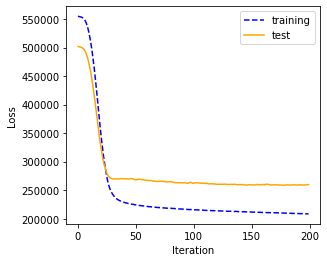

In [41]:
''' Plot loss-iteration '''
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="training", color="blue", linestyle="dashed")
plt.plot(history.history["val_loss"], label="test", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
train_rms = mean_squared_error(y_train, model.predict(X_train), squared=False)
print(f"train rmse ={train_rms}")

test_rms = mean_squared_error(y_test, model.predict(X_test), squared=False)
print(f"test rmse ={test_rms}")

13/13 [==============================] - 0s 1ms/step
train rmse =456.1561049714195
4/4 [==============================] - 0s 3ms/step
test rmse =509.42263303429655


### Due to very limited sample size(n=490) compared to feature size(p=14), the model cannot fully learn the dataset, results in a rather unstable model. 
### e.g. when changing different random_state for train-test split, NN gives fluctuating results(test RMSE~[450, 550])
### e.g. sometimes test rmse is even lower than train rmse, but sometimes normal
### test rmse is minimal when 2 hidden layers are used, which number of hidden units are (16, 8)

## Random Forest 

In [43]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 65, random_state = 50)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

train_rms = mean_squared_error(y_train, regressor.predict(X_train), squared=False)
print(f"train rmse ={train_rms}")

test_rms = mean_squared_error(y_test, regressor.predict(X_test), squared=False)
print(f"test rmse ={test_rms}")

train rmse =200.19348959384246
test rmse =531.9871038033288


### By trying different n_estimators, Random forest regression has test rmse>470

## 1-layer Perceptron

In [44]:
def build_perceptron(input_size, output_size, learning_rate=0.1,
                     l2_reg=0.0,
                     loss="mean_squared_error",
                     optimizer="Adam",
                     metric="mean_squared_error"):
    """
    :param input_size: the dimension of the input, type: int
    :param output_size: the dimension of the prediction, type: int
    :param learning_rate: the learning rate for the optimizer
    :param l2_reg: the weight for the L2 regularizer
    :param loss: the training loss
    :param optimizer: the optimizer
    :param metric: the metric
    return a 1-layer perceptron,
    # losses document: https://keras.io/losses/
    # optimizers document: https://keras.io/optimizers/
    # metrics document: https://keras.io/metrics/
    """
    model = Sequential()
    
    # the projection layer
    model.add(Dense(output_size,
                    input_dim=input_size,
                    kernel_initializer=K.initializers.he_normal(seed=0),
                    bias_initializer="zeros",
                    kernel_regularizer=K.regularizers.l2(l2_reg)))
    
    # set the loss, the optimizer, and the metric
    if optimizer == "SGD":
        optimizer = K.optimizers.SGD(lr=learning_rate)
    elif optimizer == "RMSprop":
        optmizer = K.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == "Adam":
        optmizer = K.optimizers.Adam(learning_rate=learning_rate)
    else:
        raise NotImplementedError
    model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
    
    return model

In [45]:
perceptron = build_perceptron(14, 1)
perceptron_history = perceptron.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=2000, batch_size=100, verbose=0)

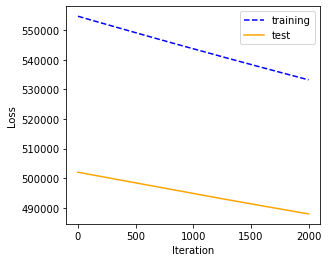

train rmse =730.202516354245
test rmse =698.5050273172267


In [46]:
''' Plot loss-iteration '''
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(perceptron_history.history["loss"], label="training", color="blue", linestyle="dashed")
plt.plot(perceptron_history.history["val_loss"], label="test", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

train_rms = mean_squared_error(y_train, perceptron.predict(X_train, verbose=0), squared=False)
print(f"train rmse ={train_rms}")

test_rms = mean_squared_error(y_test, perceptron.predict(X_test, verbose=0), squared=False)
print(f"test rmse ={test_rms}")

### having test&train rmse>700, single layer perceptron is not suitable for the dataset compared to other models(~450)

# To summarize, the above regression techniques(1-3) provides rough estimations on Overall_Survival with rmse around [450,550]  
# Now, try to incorporate Genomic Features(remaining features other than CLIs)to achieve better than this(which is also expected to improve, as much more information is provided)

In [47]:
#getting genomic features
genomic_df = df.drop(df.columns[range(1, 13)],axis=1,inplace=False)
genomic_df

,tcga_participant_barcode,CLUS_mRNA_cNMF,CLUS_mRNA_cHierarchical,CLUS_miR_cNMF,CLUS_miR_cHierarchical,CLUS_CN_cNMF,CLUS_Methlyation_cNMF,CLUS_RPPA_cNMF,CLUS_RPPA_cHierarchical,CLUS_mRNAseq_cNMF,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
0,TCGA-02-0001,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0003,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-02-0004,1.0,1.0,1.0,2.0,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0006,NaN,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0007,2.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,TCGA-87-5896,3.0,3.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,TCGA-OX-A56R,NaN,NaN,NaN,NaN,2.0,NaN,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,TCGA-RR-A6KA,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,TCGA-RR-A6KB,NaN,NaN,NaN,NaN,1.0,NaN,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
genomic_df.describe()

,CLUS_mRNA_cNMF,CLUS_mRNA_cHierarchical,CLUS_miR_cNMF,CLUS_miR_cHierarchical,CLUS_CN_cNMF,CLUS_Methlyation_cNMF,CLUS_RPPA_cNMF,CLUS_RPPA_cHierarchical,CLUS_mRNAseq_cNMF,CLUS_mRNAseq_cHierarchical,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
count,525.000000,525.000000,563.000000,563.000000,573.000000,283.000000,232.000000,232.000000,152.000000,152.000000,...,152.000000,79.000000,85.000000,152.000000,152.000000,152.000000,152.000000,148.000000,132.000000,152.000000
mean,2.411429,2.521905,2.358792,1.694494,1.778360,2.643110,2.887931,1.857759,1.901316,1.947368,...,8.391366,0.006872,0.819793,11.378832,8.531753,10.663180,8.207051,3.795454,2.970595,8.463340
std,1.160030,1.205108,1.109265,0.823858,0.780948,1.156165,1.418929,0.806645,0.725686,0.606690,...,0.646618,1.145642,1.625535,0.707082,0.949599,0.677703,0.610553,2.616939,2.933303,0.557311
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.145604,-1.442614,-2.324094,9.509399,6.576217,7.945228,6.244802,-0.728335,-1.264651,6.769460
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,1.000000,1.000000,2.000000,...,8.081150,-1.003053,-0.379320,10.892015,7.847445,10.315993,7.885770,1.837445,0.605386,8.073609
50%,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,8.424897,-0.264478,0.732313,11.384922,8.425896,10.723506,8.298700,3.352512,2.395577,8.490003
75%,3.000000,4.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000,...,8.735703,0.759610,1.766129,11.831858,9.189655,11.015581,8.616618,5.412086,5.050278,8.838695
max,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,...,10.410538,3.100052,5.983931,13.677023,12.420853,12.380909,9.994246,10.709237,10.045556,9.837085


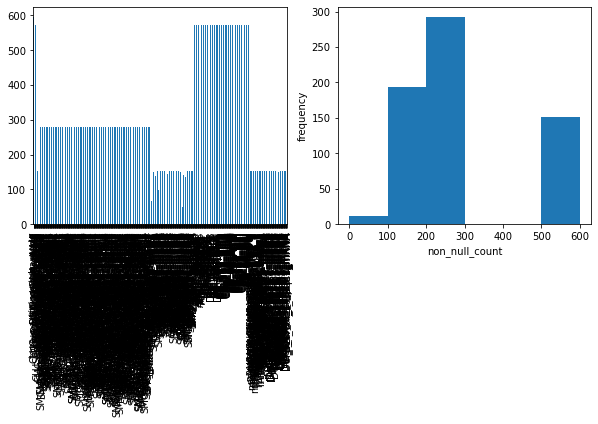

In [49]:
#try to visualise how sparse the genomic features are
non_null_count = genomic_df.count()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
non_null_count.plot(kind='bar')

plt.subplot(1,2,2)
plt.hist(non_null_count, density=False, bins=[0, 100, 200, 300, 400, 500, 600])  # density=False would make counts
plt.ylabel('frequency')
plt.xlabel('non_null_count')

plt.show()

In [50]:
#genomic_df.describe().transpose()

## note that:
1. p(#features)>n(#samples)
2. the genomic features are very sparse, most of them contains~300(half) non-null values only

### Consideration: too many feautres which is hard to examine what null-filling technique suitable for each one
### !!! Very Rough Assumption: As most of the genomic features represents mutations, 0 is used to fill NaN, implying that the non-reporting cases has no corresponding mutations

In [51]:
pd.set_option('display.max_rows', 10)
genomic_df_0 = genomic_df.fillna(value=0, inplace = False)
genomic_df_0

,tcga_participant_barcode,CLUS_mRNA_cNMF,CLUS_mRNA_cHierarchical,CLUS_miR_cNMF,CLUS_miR_cHierarchical,CLUS_CN_cNMF,CLUS_Methlyation_cNMF,CLUS_RPPA_cNMF,CLUS_RPPA_cHierarchical,CLUS_mRNAseq_cNMF,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
0,TCGA-02-0001,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCGA-02-0003,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCGA-02-0004,1.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCGA-02-0006,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCGA-02-0007,2.0,1.0,2.0,1.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,TCGA-87-5896,3.0,3.0,2.0,3.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
591,TCGA-OX-A56R,0.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
592,TCGA-RR-A6KA,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
593,TCGA-RR-A6KB,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
genomic_df_0.describe()

,CLUS_mRNA_cNMF,CLUS_mRNA_cHierarchical,CLUS_miR_cNMF,CLUS_miR_cHierarchical,CLUS_CN_cNMF,CLUS_Methlyation_cNMF,CLUS_RPPA_cNMF,CLUS_RPPA_cHierarchical,CLUS_mRNAseq_cNMF,CLUS_mRNAseq_cHierarchical,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,...,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2.127731,2.225210,2.231933,1.603361,1.712605,1.257143,1.126050,0.724370,0.485714,0.497479,...,2.143677,0.000912,0.117113,2.906861,2.179540,2.724039,2.096591,0.944079,0.659023,2.162063
std,1.338558,1.393722,1.203246,0.887998,0.836716,1.542691,1.664416,1.037022,0.906977,0.903367,...,3.677208,0.415155,0.675351,4.979498,3.754656,4.666872,3.595478,2.095532,1.850275,3.704815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.442614,-2.324094,0.000000,0.000000,0.000000,0.000000,-0.728335,-1.264651,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,7.263429,0.000000,0.000000,9.653411,6.844167,8.693194,6.623992,0.000000,0.000000,7.262893
max,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,...,10.410538,3.100052,5.983931,13.677023,12.420853,12.380909,9.994246,10.709237,10.045556,9.837085


In [53]:
# natural join genomic_df back to CLI dataframe
full_X = pd.merge(processed_CLIs_df, genomic_df_0, on='tcga_participant_barcode', how='inner')
full_X.drop(['tcga_participant_barcode', 'Overall_Survival'], axis=1, inplace = True)
full_X

,CLI_years_to_birth,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLI_gender_male,CLI_radiation_therapy_no,CLI_radiation_therapy_yes,CLI_histological_type_glioblastoma multiforme (gbm),CLI_histological_type_treated primary gbm,CLI_histological_type_untreated primary (de novo) gbm,CLI_race_asian,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
0,44.0,2002.0,80.0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,2003.0,100.0,1,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.0,2002.0,80.0,1,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.0,2002.0,80.0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,2002.0,80.0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,44.0,2011.0,80.0,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,64.0,2009.0,40.0,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,68.0,2012.0,80.0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,72.0,2012.0,80.0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling (Repeat all 4 techniques on the new feature set full_X)
1. Linear Regression
2. NN
3. Random forest Regression
4. Single-layer Perceptron

In [54]:
#normalize attributes for more even coefficients
zscore_scaler = preprocessing.StandardScaler().fit(full_X)
full_X = pd.DataFrame(zscore_scaler.transform(full_X), columns = full_X.columns)
full_X_train, full_X_test, y_train, y_test = train_test_split(full_X, y, test_size=0.2,random_state =42)
full_X

,CLI_years_to_birth,CLI_date_of_initial_pathologic_diagnosis,CLI_karnofsky_performance_score,CLI_gender_male,CLI_radiation_therapy_no,CLI_radiation_therapy_yes,CLI_histological_type_glioblastoma multiforme (gbm),CLI_histological_type_treated primary gbm,CLI_histological_type_untreated primary (de novo) gbm,CLI_race_asian,...,Del_SMYD3_1q44_mRNA,Del_TCL1A_14q24.2_mRNA,Del_TCL6_14q24.2_mRNA,Del_TFRC_3q29_mRNA,Del_TNFAIP3_6q22.1_mRNA,Del_TP53_17p13.1_mRNA,Del_TRIP11_14q24.2_mRNA,Del_TSHR_14q24.2_mRNA,Del_WIF1_12q15_mRNA,Del_WWOX_16q23.1_mRNA
0,-1.024953,-0.380253,0.165774,-1.28959,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
1,-0.597283,-0.182247,1.670024,0.77544,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
2,0.044222,-0.380253,0.165774,0.77544,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
3,-0.169613,-0.380253,0.165774,-1.28959,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
4,-1.310066,-0.380253,0.165774,-1.28959,-0.418402,0.493614,-0.216815,4.978903,-3.309263,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,-1.024953,1.401806,0.165774,-1.28959,-0.418402,0.493614,-0.216815,-0.200847,0.302182,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
486,0.400613,1.005793,-2.842725,0.77544,2.390048,-2.025874,-0.216815,-0.200847,0.302182,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
487,0.685726,1.599812,0.165774,0.77544,-0.418402,-2.025874,4.612237,-0.200847,-3.309263,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772
488,0.970839,1.599812,0.165774,-1.28959,2.390048,-2.025874,4.612237,-0.200847,-3.309263,-0.120386,...,-0.567161,0.018123,-0.137019,-0.567975,-0.564807,-0.568139,-0.567359,-0.438259,-0.354058,-0.567772


In [55]:
full_lm = LinearRegression()
score_cv = cross_val_score(full_lm, full_X, y, scoring = 'neg_root_mean_squared_error', cv=10, error_score="raise")
score_cv

array([-1.40235983e+15, -1.17361586e+15, -5.51913966e+14, -1.96384702e+15,
       -2.54473169e+14, -1.53040284e+14, -6.00611097e+14, -1.38924950e+15,
       -1.10716020e+14, -2.87042265e+15])

In [56]:
-score_cv.mean()

1047024939421714.0

In [57]:
full_lm.fit(full_X, y)
coeff_df = pd.DataFrame(full_lm.coef_.transpose(), full_X.columns, columns=['Coefficient'])  
coeff_df['Coefficient'] = coeff_df['Coefficient'].astype('int64')
coeff_df

,Coefficient
CLI_years_to_birth,-109
CLI_date_of_initial_pathologic_diagnosis,-136
CLI_karnofsky_performance_score,109
CLI_gender_male,93
CLI_radiation_therapy_no,3
...,...
Del_TP53_17p13.1_mRNA,155695860389810
Del_TRIP11_14q24.2_mRNA,11274799963187
Del_TSHR_14q24.2_mRNA,-181421405368278
Del_WIF1_12q15_mRNA,1640120904382


In [58]:
#Lasso
for alp in [x * 0.1 for x in range(1, 20)]:         #0.1~2.0
    full_lasso = Lasso(alpha = alp)
    score_lasso = cross_val_score(full_lasso, full_X, y, scoring = 'neg_root_mean_squared_error', cv=10)
    print(f"rmse at alpha={alp} is {-score_lasso.mean()}")

rmse at alpha=0.1 is 1728.6031145895663
rmse at alpha=0.2 is 1439.3722700125097
rmse at alpha=0.30000000000000004 is 1291.7928151931496
rmse at alpha=0.4 is 1181.3326174197562
rmse at alpha=0.5 is 1093.2249762888607
rmse at alpha=0.6000000000000001 is 1026.5418991863785
rmse at alpha=0.7000000000000001 is 978.5997660024999
rmse at alpha=0.8 is 936.7828452449764
rmse at alpha=0.9 is 895.3721973701968
rmse at alpha=1.0 is 865.841621855604
rmse at alpha=1.1 is 842.0853303320216
rmse at alpha=1.2000000000000002 is 818.9511381449445
rmse at alpha=1.3 is 797.3371193463253
rmse at alpha=1.4000000000000001 is 775.3773801225592
rmse at alpha=1.5 is 757.2140909591304
rmse at alpha=1.6 is 740.7787484356093
rmse at alpha=1.7000000000000002 is 726.9562188661766
rmse at alpha=1.8 is 714.8041321286998
rmse at alpha=1.9000000000000001 is 703.5358670426671


In [59]:
for alp in [x for x in range(5, 100, 5)]:         #5~100
    full_lasso = Lasso(alpha = alp)
    score_lasso = cross_val_score(full_lasso, full_X, y, scoring = 'neg_root_mean_squared_error', cv=10)
    print(f"rmse at alpha={alp} is {-score_lasso.mean()}")

rmse at alpha=5 is 564.0920124778268
rmse at alpha=10 is 510.3890626169832
rmse at alpha=15 is 491.3740368929468
rmse at alpha=20 is 480.6591476788145
rmse at alpha=25 is 475.14842956681616
rmse at alpha=30 is 473.5550599875681
rmse at alpha=35 is 472.81142923526994
rmse at alpha=40 is 472.42685603772645
rmse at alpha=45 is 471.80005140854166
rmse at alpha=50 is 471.5634073549537
rmse at alpha=55 is 471.3208778757724
rmse at alpha=60 is 471.63519429175557
rmse at alpha=65 is 472.22576749525126
rmse at alpha=70 is 472.9588438518116
rmse at alpha=75 is 474.0172080693801
rmse at alpha=80 is 475.2870322366227
rmse at alpha=85 is 476.5566348494141
rmse at alpha=90 is 477.9208579544062
rmse at alpha=95 is 479.5034578059537


In [60]:
full_lasso = Lasso(alpha = 55)
score_lasso = cross_val_score(full_lasso, full_X, y, scoring = 'neg_root_mean_squared_error', cv=10)
print(f"rmse at alpha={55} is {-score_lasso.mean()}")

rmse at alpha=55 is 471.3208778757724


In [61]:
pd.set_option('display.max_rows', 10)

full_lasso.fit(full_X, y)
coeff_df = pd.DataFrame(full_lasso.coef_.transpose(), full_X.columns, columns=['Coefficient'])  
coeff_df['Coefficient'] = coeff_df['Coefficient'].astype('int64')
coeff_df

,Coefficient
CLI_years_to_birth,-95
CLI_date_of_initial_pathologic_diagnosis,-51
CLI_karnofsky_performance_score,14
CLI_gender_male,0
CLI_radiation_therapy_no,-16
...,...
Del_TP53_17p13.1_mRNA,0
Del_TRIP11_14q24.2_mRNA,0
Del_TSHR_14q24.2_mRNA,0
Del_WIF1_12q15_mRNA,0


### Compared to the pure CLI model, Lasso shows significant reduction in rmse(699858105528733-->471) 
### However, it's rmse still higher than pure CLI model(471>456)

## Note: rmse minnimizes(471) at aplha=55, which only 5 genomic features are non-zero.

## Neural Network
### expectation: as more feature involved, model should be more complex-->more unit, more layers

In [62]:
sc = StandardScaler()
full_X_train = sc.fit_transform(full_X_train)
full_X_test = sc.transform(full_X_test)

def build_full_NN(num_first_layer_unit=17, num_second_layer_unit=8):
    # Initialising the ANN
    full_NN_model = Sequential()

    # Adding the input layer and the first hidden layer
    full_NN_model.add(Dense(num_first_layer_unit, activation = 'relu', input_dim = 662))

    # Adding the second hidden layer
    full_NN_model.add(Dense(units = num_second_layer_unit, activation = 'relu'))
    """
    # Adding the third hidden layer
    full_NN_model.add(Dense(units = 4, activation = 'relu'))
    """

    # Adding the output layer
    full_NN_model.add(Dense(units = 1))

    # Compiling the ANN
    full_NN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

    return full_NN_model
"""
# Fitting the ANN to the Training set(mini-batched gradient descent)
np.random.seed(0)
tf.random.set_seed(0)
full_history = full_NN_model.fit(full_X_train, y_train, validation_data=(full_X_test, y_test), batch_size = 10, epochs = 50)
"""

'\n# Fitting the ANN to the Training set(mini-batched gradient descent)\nnp.random.seed(0)\ntf.random.set_seed(0)\nfull_history = full_NN_model.fit(full_X_train, y_train, validation_data=(full_X_test, y_test), batch_size = 10, epochs = 50)\n'

In [63]:
#try different number of units in each hidden layer
num_hidden_unit= list()
for  x in range(12, 34,2):
    for y in range(4, 26,2):
        num_hidden_unit.append((x,y))

rmse_for_each_num_hidden = list()
for a, b in num_hidden_unit:
    full_NN_model = build_full_NN(a, b)
    full_NN_model.fit(full_X_train, y_train, validation_data=(full_X_test, y_test), batch_size = 10, epochs = 50, verbose=0)
    train_rms = mean_squared_error(y_train, full_NN_model.predict(full_X_train, verbose=0), squared=False)
    test_rms = mean_squared_error(y_test, full_NN_model.predict(full_X_test, verbose=0), squared=False)
    print(f"(first_layer, second_layer, train rmse, test rmse)=({a},{b},{round(train_rms, 2)},{round(test_rms, 2)})")
    rmse_for_each_num_hidden.append((a,b,train_rms,test_rms))

(first_layer, second_layer, train rmse, test rmse)=(12,4,452.51,513.44)
(first_layer, second_layer, train rmse, test rmse)=(12,6,421.83,515.78)
(first_layer, second_layer, train rmse, test rmse)=(12,8,431.82,513.9)
(first_layer, second_layer, train rmse, test rmse)=(12,10,390.49,505.58)
(first_layer, second_layer, train rmse, test rmse)=(12,12,418.64,516.9)
(first_layer, second_layer, train rmse, test rmse)=(12,14,391.44,513.74)
(first_layer, second_layer, train rmse, test rmse)=(12,16,445.46,512.17)
(first_layer, second_layer, train rmse, test rmse)=(12,18,399.4,518.93)
(first_layer, second_layer, train rmse, test rmse)=(12,20,397.87,516.82)
(first_layer, second_layer, train rmse, test rmse)=(12,22,402.3,521.11)
(first_layer, second_layer, train rmse, test rmse)=(12,24,389.1,525.4)
(first_layer, second_layer, train rmse, test rmse)=(14,4,426.33,516.11)
(first_layer, second_layer, train rmse, test rmse)=(14,6,394.94,509.66)
(first_layer, second_layer, train rmse, test rmse)=(14,8,438.2

In [64]:
min(rmse_for_each_num_hidden, key = lambda t: t[3])

(12, 10, 390.4949974995424, 505.5818481294718)

In [65]:
#further exploring points near (12, 10):
num_hidden_unit= list()
for  x in range(7, 17,1):
    for y in range(5, 15,1):
        num_hidden_unit.append((x,y))

rmse_for_each_num_hidden = list()
for a, b in num_hidden_unit:
    full_NN_model = build_full_NN(a, b)
    full_NN_model.fit(full_X_train, y_train, validation_data=(full_X_test, y_test), batch_size = 10, epochs = 50, verbose=0)
    train_rms = mean_squared_error(y_train, full_NN_model.predict(full_X_train, verbose=0), squared=False)
    test_rms = mean_squared_error(y_test, full_NN_model.predict(full_X_test, verbose=0), squared=False)
    print(f"(first_layer, second_layer, train rmse, test rmse)=({a},{b},{round(train_rms, 2)},{round(test_rms, 2)})")
    rmse_for_each_num_hidden.append((a,b,train_rms,test_rms))

(first_layer, second_layer, train rmse, test rmse)=(7,5,493.69,565.13)
(first_layer, second_layer, train rmse, test rmse)=(7,6,464.14,511.44)
(first_layer, second_layer, train rmse, test rmse)=(7,7,423.93,518.76)
(first_layer, second_layer, train rmse, test rmse)=(7,8,450.48,512.2)
(first_layer, second_layer, train rmse, test rmse)=(7,9,471.3,510.23)
(first_layer, second_layer, train rmse, test rmse)=(7,10,419.56,514.58)
(first_layer, second_layer, train rmse, test rmse)=(7,11,428.31,514.48)
(first_layer, second_layer, train rmse, test rmse)=(7,12,446.44,511.65)
(first_layer, second_layer, train rmse, test rmse)=(7,13,440.19,512.74)
(first_layer, second_layer, train rmse, test rmse)=(7,14,451.45,511.81)
(first_layer, second_layer, train rmse, test rmse)=(8,5,510.01,559.76)
(first_layer, second_layer, train rmse, test rmse)=(8,6,449.09,510.31)
(first_layer, second_layer, train rmse, test rmse)=(8,7,459.9,510.56)
(first_layer, second_layer, train rmse, test rmse)=(8,8,417.95,515.91)
(fir

In [66]:
min(rmse_for_each_num_hidden, key = lambda t: t[3])

(9, 11, 421.72322995905904, 503.8898273180585)

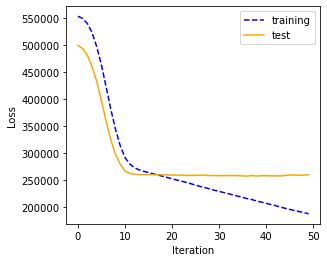

(train rmse, test rmse)=(429.49,509.26)


In [67]:
''' Plot loss-iteration for (9,11) '''
full_NN_model = build_full_NN(9,11)
full_history = full_NN_model.fit(full_X_train, y_train, validation_data=(full_X_test, y_test), batch_size = 10, epochs = 50, verbose = 0)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(full_history.history["loss"], label="training", color="blue", linestyle="dashed")
plt.plot(full_history.history["val_loss"], label="test", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()
train_rms = mean_squared_error(y_train, full_NN_model.predict(full_X_train, verbose=0), squared=False)
test_rms = mean_squared_error(y_test, full_NN_model.predict(full_X_test, verbose=0), squared=False)
print(f"(train rmse, test rmse)=({round(train_rms, 2)},{round(test_rms, 2)})")

### Compared to pure CLI_model, NN rmse improves slightly(510->508)
### however, It is still much larger than the linear regression benchmark of (456)

## Random Forest

In [68]:
 # create regressor object
full_RF = RandomForestRegressor(n_estimators = 65, random_state = 50)
 
# fit the regressor with x and y data
full_RF.fit(full_X_train, y_train) 

train_rms = mean_squared_error(y_train, full_RF.predict(full_X_train), squared=False)
print(f"train rmse ={train_rms}")

test_rms = mean_squared_error(y_test, full_RF.predict(full_X_test), squared=False)
print(f"test rmse ={test_rms}")

train rmse =183.3831456100294
test rmse =539.9544908189363


### compared to pure CLIs, test rmse worsened(476->539)

## 1-layer Perceptron

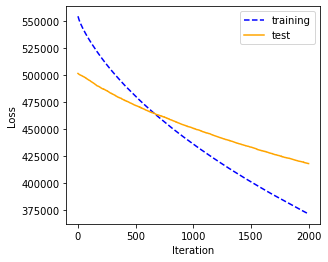

13/13 [==============================] - 0s 1ms/step
train rmse =609.6584223238536
4/4 [==============================] - 0s 3ms/step
test rmse =646.8127988289891


In [69]:
full_perceptron = build_perceptron(662, 1)
perceptron_history = full_perceptron.fit(full_X_train, y_train,
                    validation_data=(full_X_test, y_test),
                    epochs=2000, batch_size=10, verbose=0)
''' Plot loss-iteration '''
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(perceptron_history.history["loss"], label="training", color="blue", linestyle="dashed")
plt.plot(perceptron_history.history["val_loss"], label="test", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.show()
train_rms = mean_squared_error(y_train, full_perceptron.predict(full_X_train), squared=False)
print(f"train rmse ={train_rms}")

test_rms = mean_squared_error(y_test, full_perceptron.predict(full_X_test), squared=False)
print(f"test rmse ={test_rms}")

### compared to CLIs, test rmse improves as epochs increases(694<772)